In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.pyplot import show

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
I_s = df[df['Species'] == 'Iris-setosa'][:25]

In [7]:
I_v = df[df['Species'] == 'Iris-versicolor'][:25]

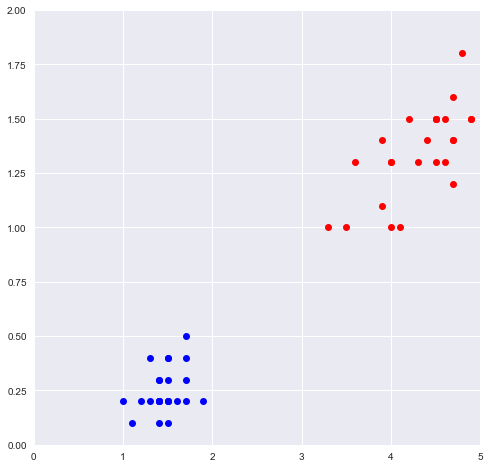

In [8]:
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(I_s['PetalLengthCm'], I_s['PetalWidthCm'], 'o', markersize = 7, color='blue')
ax.plot(I_v['PetalLengthCm'], I_v['PetalWidthCm'], 'o', markersize = 7, color='red')
plt.xlim(0, 5) 
plt.ylim(0, 2) 
show()

In [9]:
x = [i for i in zip(np.concatenate((I_s['PetalLengthCm'], I_v['PetalLengthCm'])), np.concatenate((I_s['PetalWidthCm'], I_v['PetalWidthCm'])))]

In [10]:
def misclassified(beta, x, y):
    dot_prod = [np.dot(i,beta[1:])+beta[0] for i in x]
    res_sign = [np.sign(i) for i in dot_prod]
    res_diff = [i[1] if i[0] != i[1] else 0 for i in zip(res_sign,y)]
#     print(res_sign, res_diff)
    loss = np.multiply(res_diff, dot_prod)
    return - np.sum(loss)

In [11]:
y = np.concatenate((-np.ones(25), np.ones(25)))

In [12]:
func = lambda beta: misclassified(beta, x,y)

In [19]:
res = sp.optimize.minimize(func, [.1,0.1,-0.1])

In [20]:
x_axis = np.arange(0,5,0.01)
b = res.x
y_res = [(-b[0]-b[1]*i)/b[2] for i in x_axis]

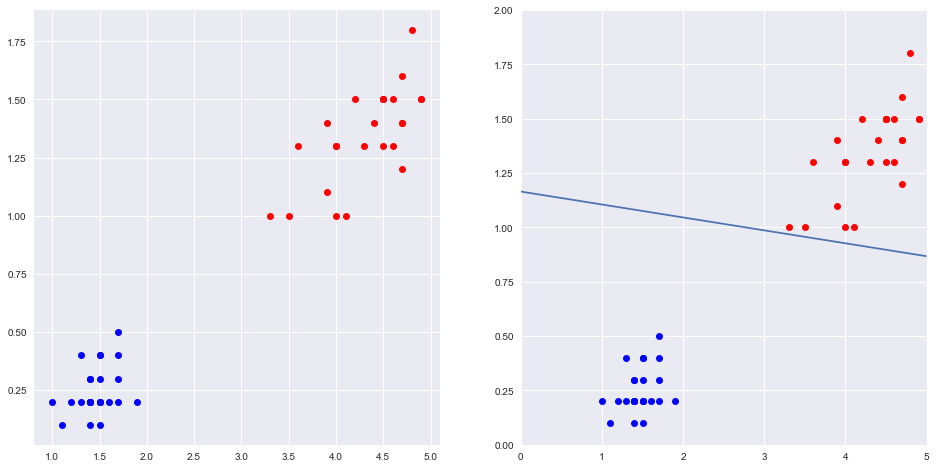

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,8))
ax1.plot(I_s['PetalLengthCm'], I_s['PetalWidthCm'], 'o', markersize = 7, color='blue')
ax1.plot(I_v['PetalLengthCm'], I_v['PetalWidthCm'], 'o', markersize = 7, color='red')
ax2.plot(I_s['PetalLengthCm'], I_s['PetalWidthCm'], 'o', markersize = 7, color='blue')
ax2.plot(I_v['PetalLengthCm'], I_v['PetalWidthCm'], 'o', markersize = 7, color='red')
ax2.plot(x_axis, y_res)
plt.xlim(0, 5) 
plt.ylim(0, 2) 
show()